In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

DF = pd.read_excel("DATASET.xls",sheet_name=1)
DF1 = DF.drop(DF.columns[[0,1,2,3,4,7,8,9,13,18,19,21,30,23,22,24,26,28]], axis=1)
DF1.replace(["n.d.", "n.s."], np.nan, inplace=True)
DF1.dropna(inplace=True)
print(DF1.dtypes)
num_righe = DF1.shape[0]
print("Numero di righe dopo la pulizia:", num_righe)

Dipendenti\nUltimo anno disp.                                        int64
Utile netto (Ultimo anno)\nmigl EUR\nUltimo anno disp.             float64
EBITDA\nmigl EUR\nUltimo anno disp.                                float64
Totale Attività\nmigl EUR\nUltimo anno disp.                       float64
Patrimonio Netto\nmigl EUR\nUltimo anno disp.                      float64
Debt/Equity ratio\n%\nUltimo anno disp.                            float64
Debiti v/banche su fatt. \n%\nUltimo anno disp.                    float64
ATTIVO CIRCOLANTE\nmigl EUR\nUltimo anno disp.                     float64
DEBITI A BREVE\nmigl EUR\nUltimo anno disp.                        float64
Indice di indebitam. a lungo\n%\nUltimo anno disp.                 float64
TOT. VAL. DELLA PRODUZIONE\nmigl EUR\nUltimo anno disp.            float64
TOTALE PROVENTI E ONERI FINANZIARI\nmigl EUR\nUltimo anno disp.    float64
Imposte correnti\nmigl EUR\nUltimo anno disp.                      float64
DEBITO FINALE (conviene= 

<ipython-input-2-3800e9b91506>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DF1.replace(["n.d.", "n.s."], np.nan, inplace=True)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = DF1.iloc[:, :-1]
y = DF1.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


METRICHE PER TRAIN SET:
Accuracy: 0.8640
Precision: 0.8119
Recall: 0.8528
F1-score: 0.8318
METRICHE PER TEST SET:
Accuracy: 0.8688
Precision: 0.8154
Recall: 0.8635
F1-score: 0.8388


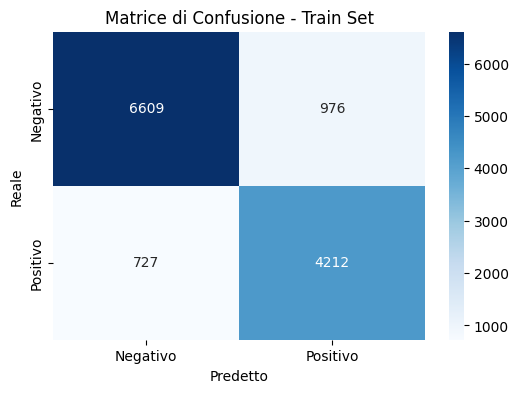

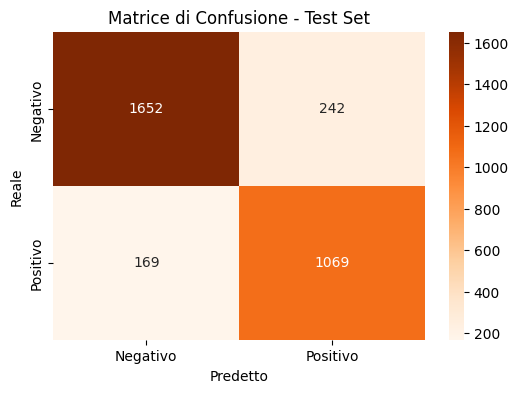

CLASSIFICATION REPORT - TEST SET:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1894
           1       0.82      0.86      0.84      1238

    accuracy                           0.87      3132
   macro avg       0.86      0.87      0.86      3132
weighted avg       0.87      0.87      0.87      3132



In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("METRICHE PER TRAIN SET:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-score: {train_f1:.4f}")

print("METRICHE PER TEST SET:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-score: {test_f1:.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.title("Matrice di Confusione - Train Set")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Oranges", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.title("Matrice di Confusione - Test Set")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.show()

print("CLASSIFICATION REPORT - TEST SET:")
print(classification_report(y_test, y_test_pred))

In [5]:
print(f"Numero di dati nel training set: {X_train.shape[0]}")
print(f"Numero di dati nel test set: {X_test.shape[0]}")

Numero di dati nel training set: 12524
Numero di dati nel test set: 3132


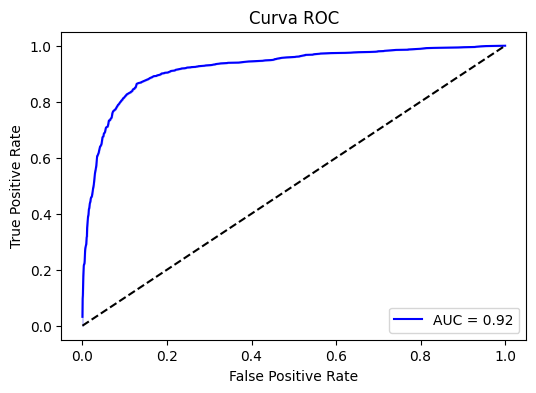

In [6]:
 from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
sns.lineplot(x=fpr, y=tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

In [7]:
pip install statsmodels

In [8]:
import statsmodels.api as sm
import numpy as np

X = DF1.drop(columns=["DEBITO FINALE (conviene= 0; non conviene =1)"])
X = sm.add_constant(X)

y = DF1.iloc[:, -1]

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

odds_ratios = np.exp(result.params)
print("Odds Ratios:")
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.396679
         Iterations 9
                                        Logit Regression Results                                        
Dep. Variable:     DEBITO FINALE (conviene= 0; non conviene =1)   No. Observations:                15656
Model:                                                    Logit   Df Residuals:                    15642
Method:                                                     MLE   Df Model:                           13
Date:                                          Sun, 23 Mar 2025   Pseudo R-squ.:                  0.4086
Time:                                                  14:05:16   Log-Likelihood:                -6210.4
converged:                                                 True   LL-Null:                       -10501.
Covariance Type:                                      nonrobust   LLR p-value:                     0.000
                                                          

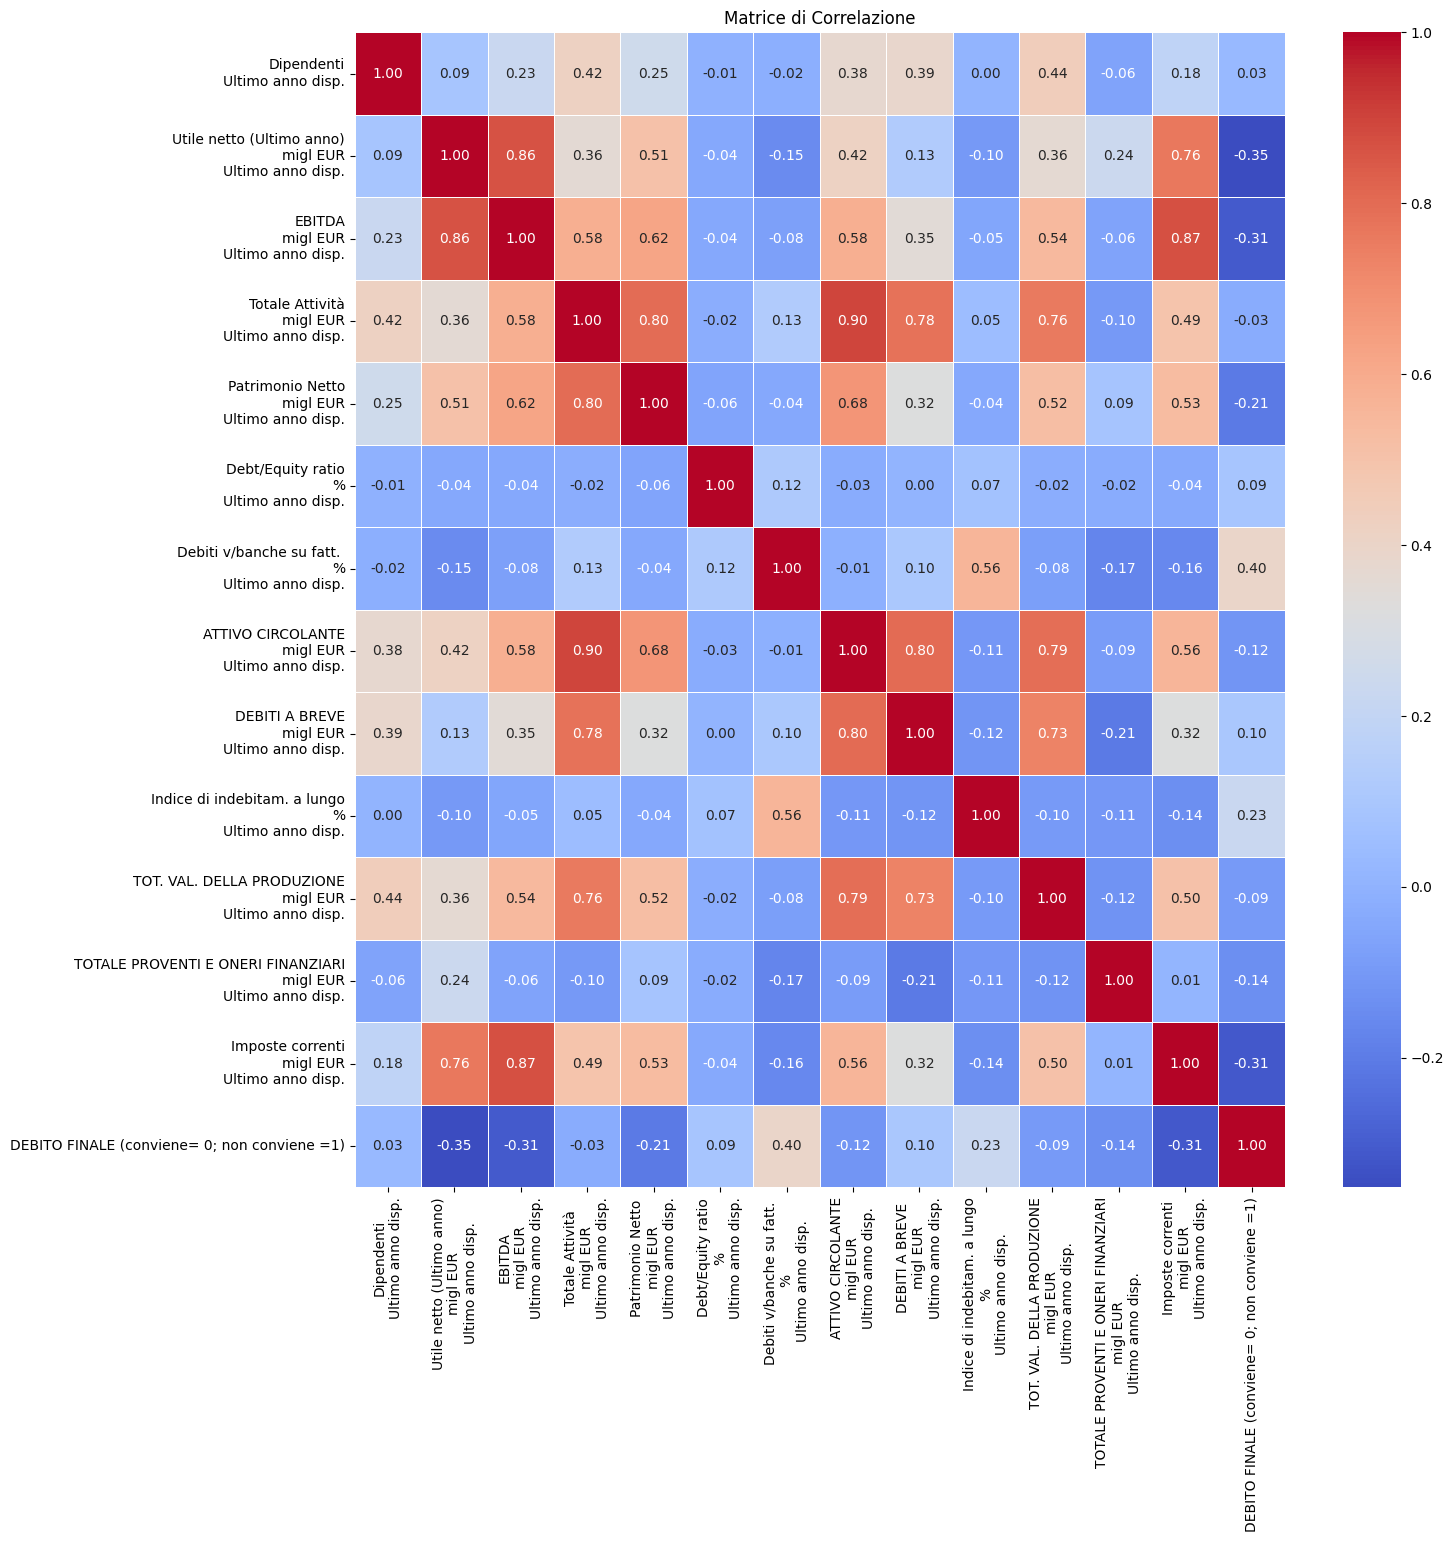

In [9]:
correlation_matrix = DF1.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice di Correlazione")
plt.show()